In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
from scipy.stats import ttest_ind
import scipy.stats as stats

In [2]:
from google.colab import drive
drive.mount('/content/drive')

vendor_sales_summary = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Vendor Project/vendor_sales_summary.csv")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
df = vendor_sales_summary
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
0,9819,TREASURY WINE ESTATES,27342,19 Crimes The Banished Red,8.72,12.99,750.0,1065,9286.80,3,38.97,25.98,0.33,14836.57,-9247.83,-23730.63895,0.002817,0.004196
1,2000,SOUTHERN WINE & SPIRITS NE,15880,San Polo Brun di Montlcno 11,48.69,74.99,750.0,600,29214.00,2,149.98,74.99,0.22,19016.59,-29064.02,-19378.59715,0.003333,0.005134
2,4425,MARTIGNETTI COMPANIES,27553,Hedges Family Estate Red Mtn,17.76,26.99,750.0,228,4049.28,1,26.99,26.99,0.11,144929.24,-4022.29,-14902.88996,0.004386,0.006665
3,9165,ULTRA BEVERAGE COMPANY LLP,27274,Jos Phelps Insignia 13,137.25,209.99,750.0,174,23881.50,1,209.99,209.99,0.11,68054.70,-23671.51,-11272.68441,0.005747,0.008793
4,2000,SOUTHERN GLAZERS W&S OF NE,27969,Fattoria le Pupille Poggio,24.34,36.99,750.0,168,4089.12,1,36.99,36.99,0.11,19016.59,-4052.13,-10954.66342,0.005952,0.009046


- The 'Data Cleaning and Analysis' file focused on identifying key variables, understanding their relationships, extracting relevent variable, and its compilation.

- This file focuses on EDA, analyzing the compiled data to gain insights into distribution of each column, helping us understand data patterns and outliers, thusensuring data quality for further examination.

In [4]:
vendor_sales_summary.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10693.0,10649.892921,18752.805318,2.00000,3951.000000,7153.000000,9552.000000,2.013590e+05
Brand,10693.0,18037.744319,12662.525384,58.00000,5789.000000,18761.000000,25514.000000,9.063100e+04
PurchasePrice,10693.0,24.383023,109.264519,0.00000,6.840000,10.450000,19.470000,5.681810e+03
ActualPrice,10693.0,35.640338,148.239484,0.00000,10.990000,15.990000,28.990000,7.499990e+03
Volume,10693.0,847.351445,664.278813,50.00000,750.000000,750.000000,750.000000,2.000000e+04
TotalPurchaseQuantity,10693.0,3140.781539,11094.573249,1.00000,36.000000,262.000000,1978.000000,3.376600e+05
TotalPurchaseDollars,10693.0,30103.877820,123062.388765,0.00000,453.180000,3655.230000,20733.420000,3.811252e+06
TotalSalesQuantity,10693.0,3077.356308,10952.346909,0.00000,33.000000,261.000000,1929.000000,3.349390e+05
TotalSalesDollars,10693.0,42244.312108,167648.300465,0.00000,729.270000,5298.210000,28406.050000,5.101920e+06
TotalSalesPrice,10693.0,18797.686610,44952.483000,0.00000,289.710000,2857.800000,16075.380000,6.728193e+05


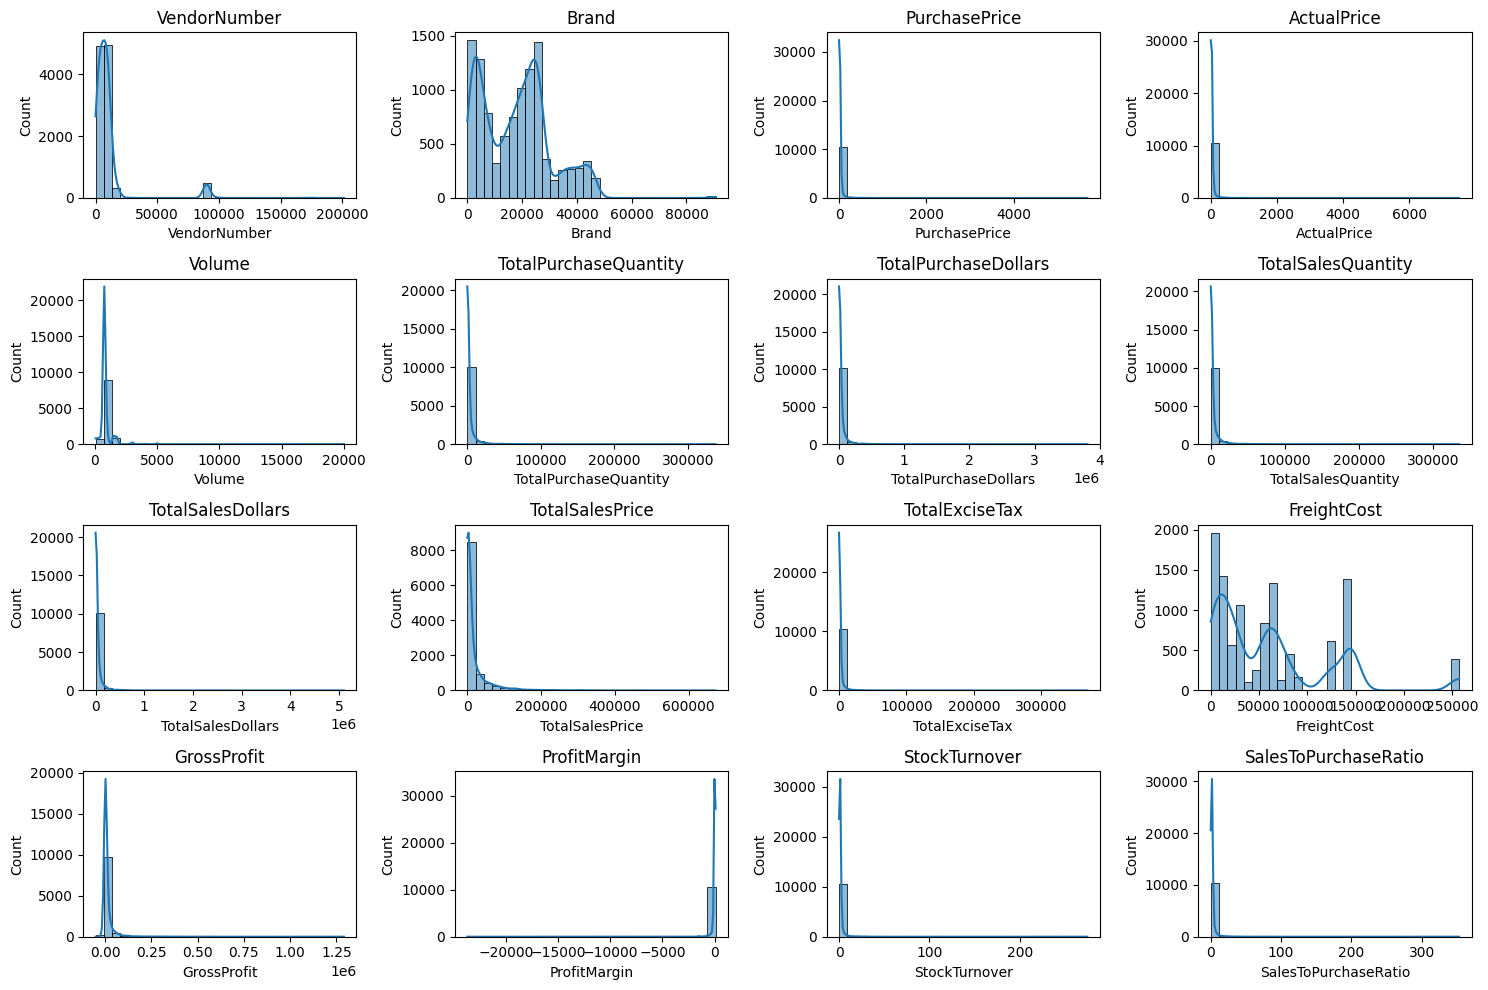

In [5]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes (include = np.number).columns

plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(4, 4, i+1)
  sns.histplot(df[col], kde = True, bins = 30)
  plt.title(col)
plt.tight_layout()
plt.show()

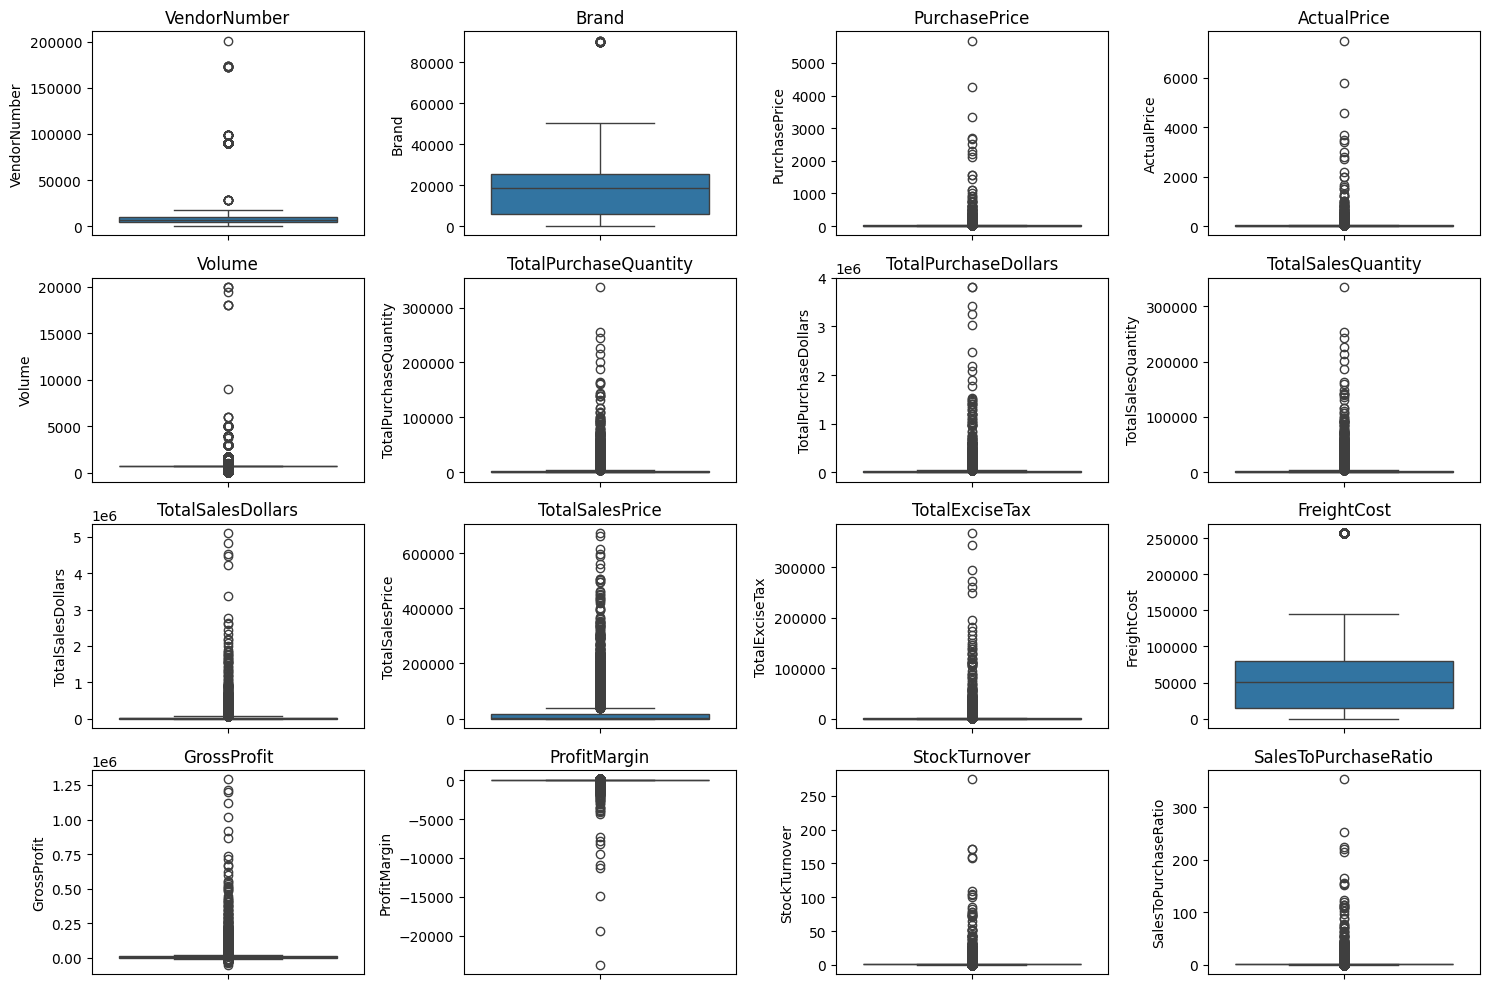

In [6]:
# Outlier Detection with Boxplots
plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(4, 4, i+1)
  sns.boxplot(y = df[col])
  plt.title(col)
plt.tight_layout()
plt.show()

# **Statistics Insight Summary:**

**Negative & Zero Values**

*  Gross Profit: Minimum value being -52,002.78 indicates losses. SOme products or transactions may be selling at a loss due to high costs or selling at discounted prices, lower than the purchase price.
*  Profit Margin: Has a maximum of -∞, which suggests cases where revenue is zero or even lower than the costs.
*  Total Sales Quantity & Sales Dollars: Minimum values are 0, which indicates that a part of stock purchased was never sold. These could be slow-moving or obsolete stock.

**Outliers Indicated by High Statndard Deviation**

*   Purchase & Actual Prices: the maximum value (5,681.81 and 7,499.99) are significantly higher than the mean (24.39 and 35.64), pointing to a potential premium product.
*   Freight Cost: Huge variations, from 0.09 to 257,032.07 suggests logistics inefficiencies or bulk shipments.
*   Stock Turnover: Ranges from 0 to 274.5, implying that some products sell extremely fast while others remain in stock indefinitely. Value more than 1 indicates that sold quantity for that prodcut is higher than purchase quantity due to sales being fulfilled from older stock.








In [7]:
# Filtering inconsistencies
df = df[
    (df["GrossProfit"] > 0) &
    (df["ProfitMargin"] > 0) &
    (df["TotalSalesQuantity"] > 0)]

In [8]:
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio
1951,9819,TREASURY WINE ESTATES,20413,Pepperjack Barossa Red,15.99,23.99,750.0,12,191.88,8,191.92,119.95,0.88,14836.57,0.04,0.020842,0.666667,1.000208
1952,3252,E & J GALLO WINERY,19374,The Naked Grape Cab Svgn,11.99,17.99,3000.0,48,575.52,36,575.64,143.91,16.20,61966.91,0.12,0.020846,0.750000,1.000209
1953,9552,M S WALKER INC,24206,Flint & Steel Svgn Bl Napa V,9.99,14.99,750.0,12,119.88,8,119.92,119.92,0.88,55551.82,0.04,0.033356,0.666667,1.000334
1954,4692,KOBRAND CORPORATION,16196,Croft Tawny Porto,7.99,11.99,750.0,24,191.76,16,191.84,119.90,1.78,9139.38,0.08,0.041701,0.666667,1.000417
1955,4425,MARTIGNETTI COMPANIES,14099,Douglass Hill Merlot,3.99,5.99,750.0,36,143.64,24,143.76,29.95,2.71,144929.24,0.12,0.083472,0.666667,1.000835
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10511,12546,JIM BEAM BRANDS COMPANY,3406,Skinnygirl Tangerine Vodka,10.78,14.99,750.0,1,10.78,158,2368.42,1034.31,124.50,123880.97,2357.64,99.544844,158.000000,219.705009
10512,2555,DISARONNO INTERNATIONAL LLC,5831,DiSaronno Amaretto,5.34,6.99,200.0,4,21.36,684,4781.16,2320.68,143.64,5861.03,4759.80,99.553246,171.000000,223.837079
10513,9165,ULTRA BEVERAGE COMPANY LLP,11209,Pezzi King Svgn Bl Dry Creek,8.78,12.99,750.0,1,8.78,171,2221.29,1571.79,18.92,68054.70,2212.51,99.604734,171.000000,252.994305
10514,6213,MHW LTD,4703,Blue Chair Bay Coconut Rum,0.77,0.99,50.0,10,7.70,2745,2717.55,1270.17,141.27,9621.58,2709.85,99.716657,274.500000,352.928571


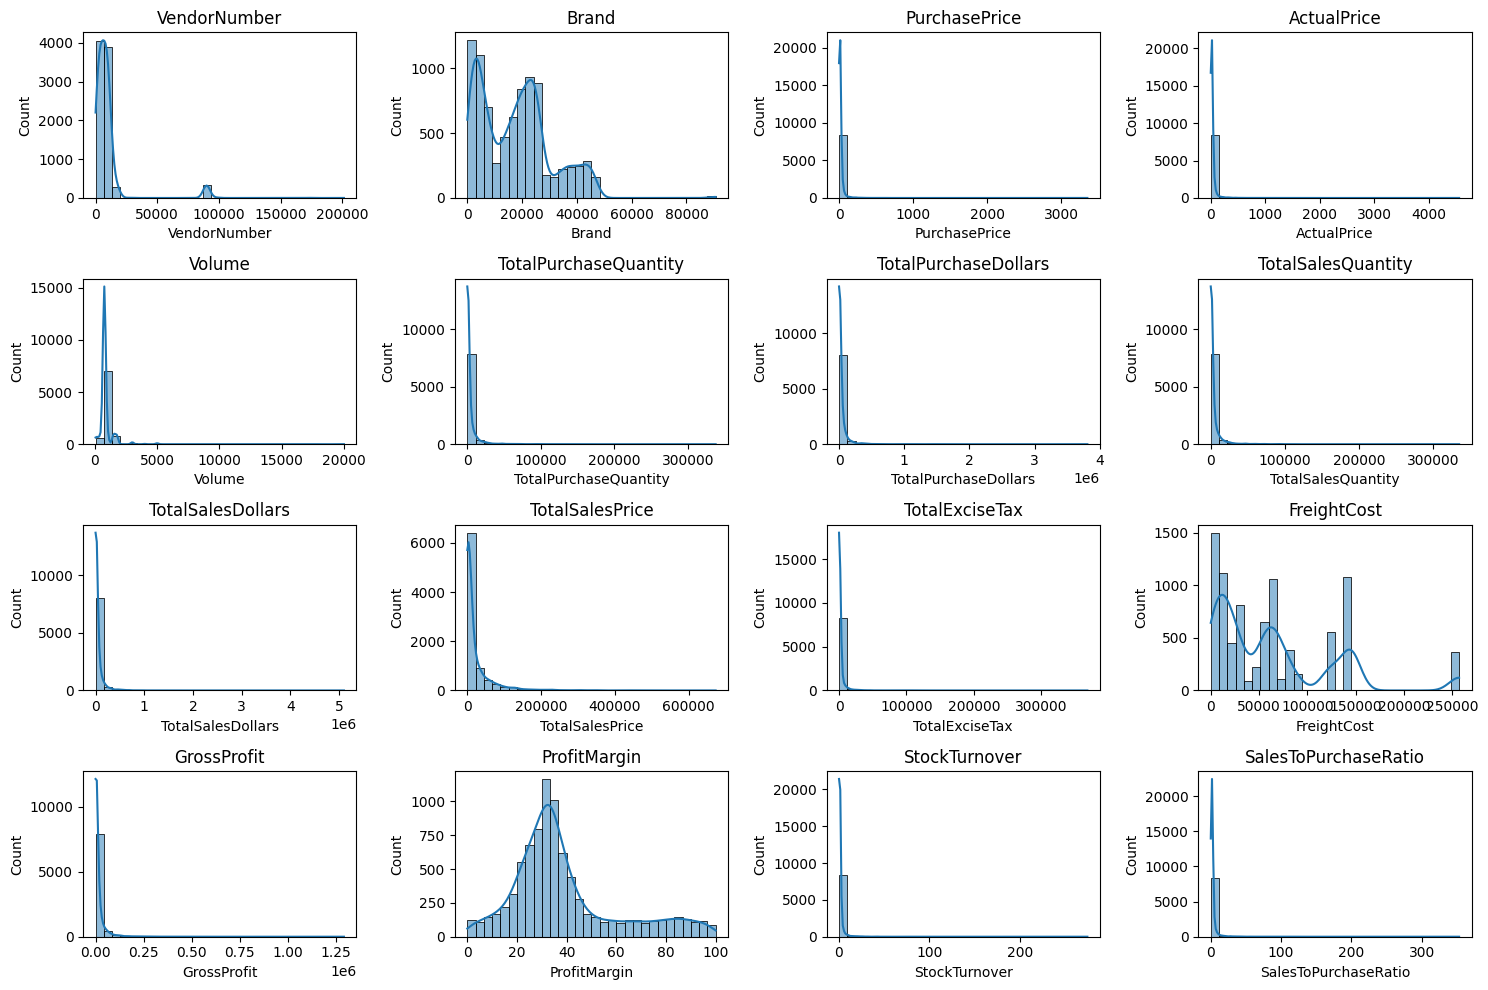

In [9]:
# Distribution Plots for Numerical Columns
numerical_cols = df.select_dtypes (include = np.number).columns

plt.figure(figsize = (15, 10))
for i, col in enumerate(numerical_cols):
  plt.subplot(4, 4, i+1)
  sns.histplot(df[col], kde = True, bins = 30)
  plt.title(col)
plt.tight_layout()
plt.show()

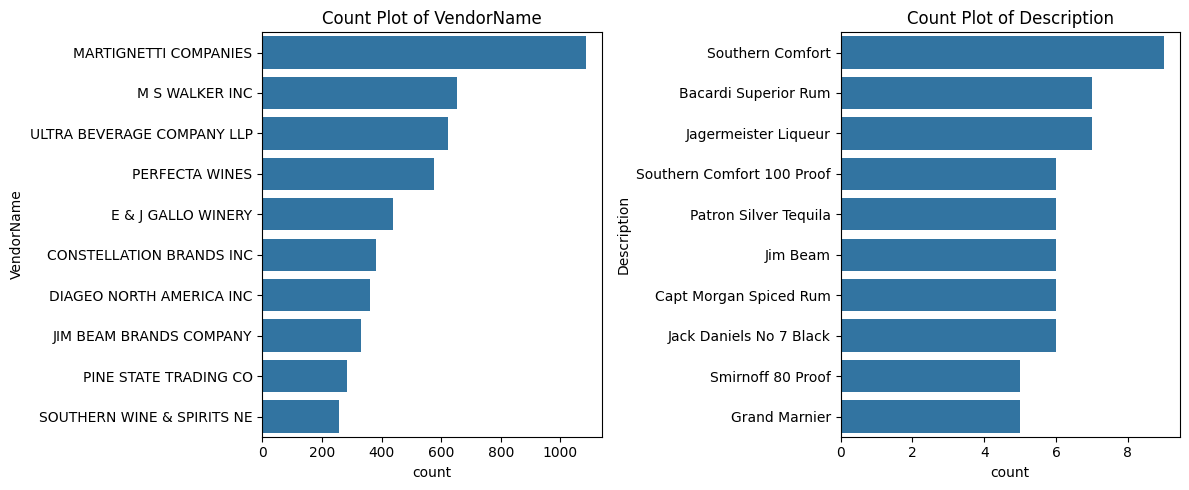

In [10]:
# Count Plots for Categorical Columns
categorical_cols = ["VendorName", "Description"]

plt.figure(figsize = (12, 5))
for i, col in enumerate(categorical_cols):
    plt.subplot(1, 2, i+1)
    sns.countplot(y = df[col], order = df[col].value_counts().index[:10])
    plt.title(f"Count Plot of {col}")
plt.tight_layout()
plt.show()

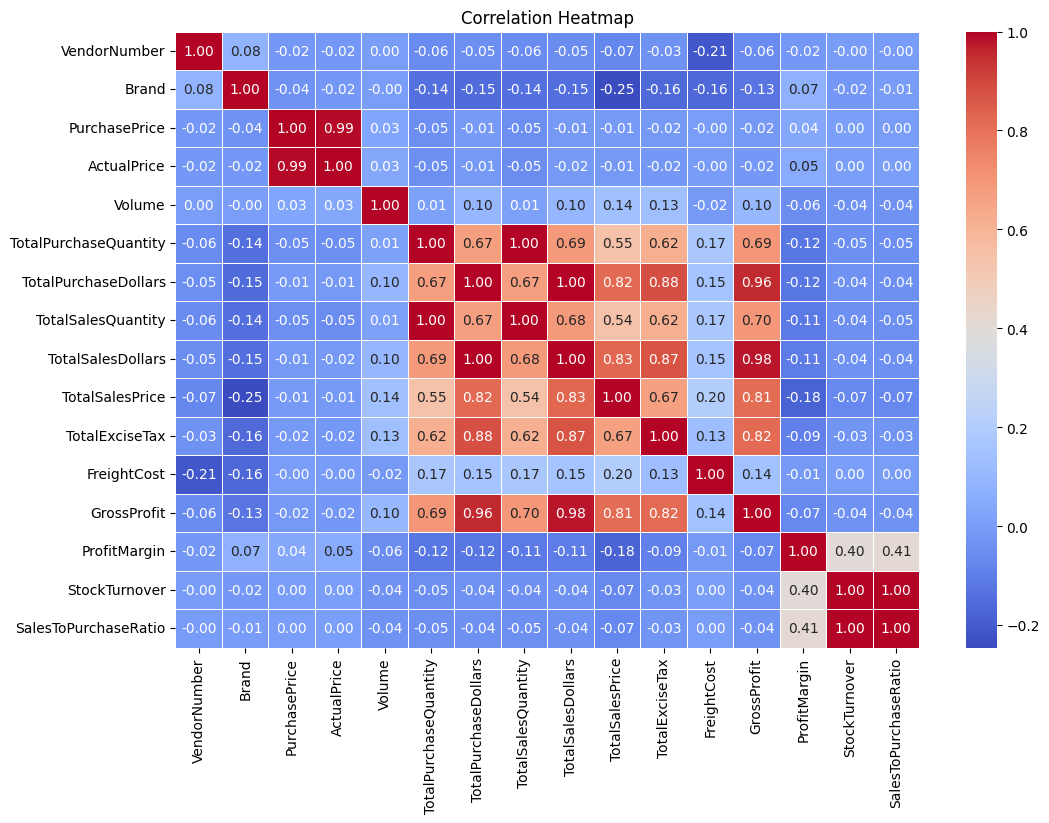

In [11]:
# Correlation Heatmap
plt.figure(figsize = (12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot = True, fmt = ".2f", cmap = "coolwarm", linewidth = 0.5)
plt.title("Correlation Heatmap")
plt.show()

# **Correlation Insights**

*   Purchase Price has weak correlation with Total Sales Dollars (-0.012) and Gross Profit (-0.016), suggesting that price variations do not significantly impact sales revenue or profit.
*   Strong correlation between Total Purchase Quantity and Total Sales Quantity (0.999) which confirms an efficient inventory turnover.
*   Negative correlation between profit margin & total sales price (-0.179) suggests that as sales price increases, margins decrease, possibly due to competitive pricing pressures.
*   Stock Turnover has weak negative correlations with both Gross Profit (-0.038) and Profit Margin (-0.055), indicating that faster turnover does not neccesarily result in higher profitability.

# **DATA ANALYSIS**

> Identify brands that need promotional or pricing adjustments which exhibit lower sales performance but higher profit margins.



In [12]:
brand_performance = df.groupby('Description').agg({
    'TotalSalesDollars':'sum',
    'ProfitMargin':'mean'}).reset_index()

In [13]:
low_sales_threshold = brand_performance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brand_performance['ProfitMargin'].quantile(0.85)

In [14]:
low_sales_threshold

np.float64(560.357)

In [15]:
high_margin_threshold

np.float64(65.03587867849998)

In [16]:
# Filtering brands with low sales but high profit margins
target_brands = brand_performance[
    (brand_performance['TotalSalesDollars'] <= low_sales_threshold) &
    (brand_performance['ProfitMargin'] >= high_margin_threshold)]

print("Brands with Low Sales but High Profit Margins:")
display(target_brands.sort_values('TotalSalesDollars'))

Brands with Low Sales but High Profit Margins:


,Description,TotalSalesDollars,ProfitMargin
6199,Santa Rita Organic Svgn Bl,9.99,66.466466
2369,Debauchery Pnt Nr,11.58,65.975820
2070,Concannon Glen Ellen Wh Zin,15.95,83.448276
2188,Crown Royal Apple,27.86,89.806174
6237,Sauza Sprklg Wild Berry Marg,27.96,82.153076
...,...,...,...
5074,Nanbu Bijin Southern Beauty,535.68,76.747312
2271,Dad's Hat Rye Whiskey,538.89,81.851584
57,A Bichot Clos Marechaudes,539.94,67.740860
6245,Sbragia Home Ranch Merlot,549.75,66.444748


In [17]:
brand_performance = brand_performance[brand_performance['TotalSalesDollars'] < 10000]     # For Better Visualisation

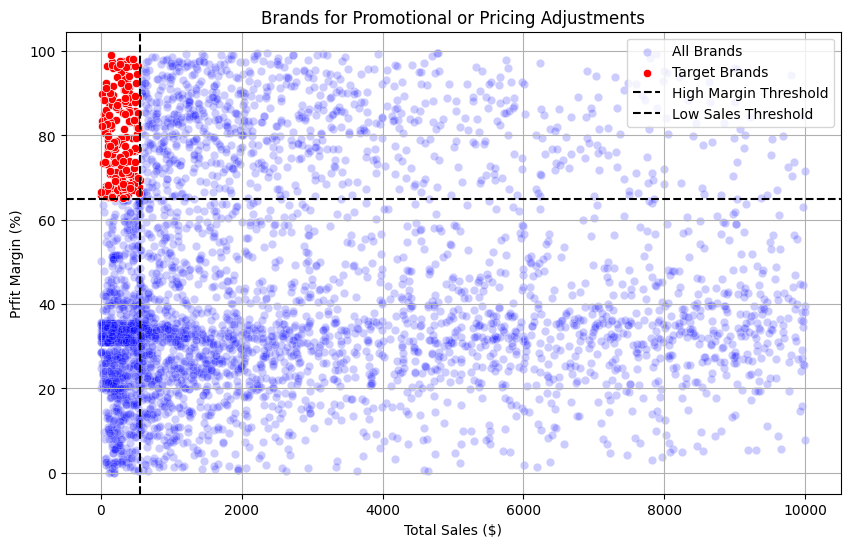

In [18]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = brand_performance, x='TotalSalesDollars', y='ProfitMargin', color="blue", label="All Brands", alpha = 0.2)
sns.scatterplot(data = target_brands, x='TotalSalesDollars', y='ProfitMargin', color="red", label="Target Brands")

plt.axhline(high_margin_threshold, linestyle="--", color='black', label="High Margin Threshold")
plt.axvline(low_sales_threshold, linestyle='--', color='black', label="Low Sales Threshold")

plt.xlabel("Total Sales ($)")
plt.ylabel("Prfit Margin (%)")
plt.title("Brands for Promotional or Pricing Adjustments")
plt.legend()
plt.grid(True)
plt.show()

> Which vendors and brands demonstrate the highest sales performance?



In [19]:
# Formatting numbers to be more readable
def format_dollars(value):
  if value >= 1_000_000:
    return f"{value / 1_000_000:.2f}M"
  elif value >= 1_000:
    return f"{value / 1_000:.2f}K"
  else:
    return str(value)

In [20]:
# Top Vendors & Brands by Sales Performance
top_vendors = df.groupby("VendorName")["TotalSalesDollars"].sum().nlargest(10)
top_brands = df.groupby("Description")["TotalSalesDollars"].sum().nlargest(10)

In [21]:
top_vendors

,TotalSalesDollars
VendorName,
DIAGEO NORTH AMERICA INC,67990099.42
MARTIGNETTI COMPANIES,39330359.36
PERNOD RICARD USA,32063196.19
JIM BEAM BRANDS COMPANY,31423020.46
BACARDI USA INC,24854817.14
CONSTELLATION BRANDS INC,24218745.65
E & J GALLO WINERY,18399899.46
BROWN-FORMAN CORP,18247230.65
ULTRA BEVERAGE COMPANY LLP,16502544.31


In [22]:
top_brands

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7964746.76
Tito's Handmade Vodka,7399657.58
Grey Goose Vodka,7209608.06
Capt Morgan Spiced Rum,6356320.62
Absolut 80 Proof,6244752.03
Jameson Irish Whiskey,5715759.69
Ketel One Vodka,5070083.56
Baileys Irish Cream,4150122.07
Kahlua,3604858.66


In [23]:
# Formatting numbers for easy readability
top_brands.apply(lambda x : format_dollars(x))

,TotalSalesDollars
Description,
Jack Daniels No 7 Black,7.96M
Tito's Handmade Vodka,7.40M
Grey Goose Vodka,7.21M
Capt Morgan Spiced Rum,6.36M
Absolut 80 Proof,6.24M
Jameson Irish Whiskey,5.72M
Ketel One Vodka,5.07M
Baileys Irish Cream,4.15M
Kahlua,3.60M


/tmp/ipython-input-2833246399.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values, palette = "Blues_r")
/tmp/ipython-input-2833246399.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax2 = sns.barplot(y = top_brands.index.astype(str), x = top_brands.values, palette = "Reds_r")


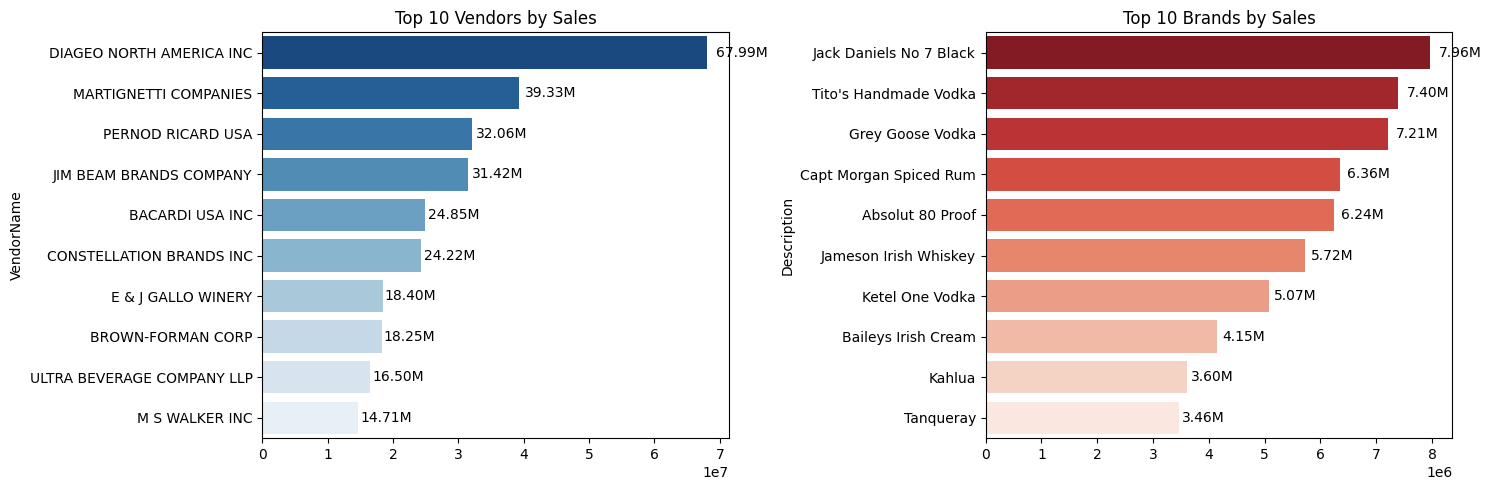

In [24]:
plt.figure(figsize = (15, 5))

# Plot for Top Vendors
plt.subplot(1, 2, 1)
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values, palette = "Blues_r")
plt.title("Top 10 Vendors by Sales")

for bar in ax1.patches:
  ax1.text(bar.get_width() + (bar.get_width() * 0.02),
           bar.get_y() + bar.get_height() / 2,
           format_dollars(bar.get_width()),
           ha = 'left', va = 'center', fontsize = 10, color = 'black')

#Plot for Top Brands
plt.subplot(1, 2, 2)
ax2 = sns.barplot(y = top_brands.index.astype(str), x = top_brands.values, palette = "Reds_r")
plt.title("Top 10 Brands by Sales")

for bar in ax2.patches:
  ax2.text(bar.get_width() + (bar.get_width() * 0.02),
           bar.get_y() + bar.get_height() / 2,
           format_dollars(bar.get_width()),
           ha = 'left', va = 'center', fontsize = 10, color = 'black')

plt.tight_layout()
plt.show()

> Which vendors contribute the most to total purchase dollars?



In [25]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'GrossProfit':'sum',
    'TotalSalesDollars':'sum'}).reset_index()

In [26]:
vendor_performance['PurchaseContribution%'] = vendor_performance['TotalPurchaseDollars']/vendor_performance['TotalPurchaseDollars'].sum()*100

In [27]:
round(vendor_performance.sort_values('PurchaseContribution%', ascending = False), 2)

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50097226.16,17892873.26,67990099.42,16.30
57,MARTIGNETTI COMPANIES,25502095.83,13828263.53,39330359.36,8.30
68,PERNOD RICARD USA,23851164.17,8212032.02,32063196.19,7.76
46,JIM BEAM BRANDS COMPANY,23494304.32,7928716.14,31423020.46,7.64
6,BACARDI USA INC,17432020.26,7422796.88,24854817.14,5.67
...,...,...,...,...,...
33,FANTASY FINE WINES CORP,128.64,198.95,327.59,0.00
107,UNCORKED,118.74,58.20,176.94,0.00
85,SILVER MOUNTAIN CIDERS,77.18,265.33,342.51,0.00
16,CAPSTONE INTERNATIONAL,54.64,192.23,246.87,0.00


In [28]:
vendor_performance = round(vendor_performance.sort_values('PurchaseContribution%', ascending = False), 2)

In [29]:
# Display Top 10 Vendors
top_vendors = vendor_performance.head(10)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
top_vendors['GrossProfit'] = top_vendors['GrossProfit'].apply(format_dollars)
top_vendors

/tmp/ipython-input-2774283761.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(format_dollars)
/tmp/ipython-input-2774283761.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(format_dollars)
/tmp/ipython-input-2774283761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18


In [30]:
top_vendors['PurchaseContribution%'].sum()

np.float64(65.69000000000001)

In [31]:
top_vendors['CumulativeContribution%'] = top_vendors['PurchaseContribution%'].cumsum()
top_vendors

/tmp/ipython-input-3342076903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_vendors['CumulativeContribution%'] = top_vendors['PurchaseContribution%'].cumsum()


,VendorName,TotalPurchaseDollars,GrossProfit,TotalSalesDollars,PurchaseContribution%,CumulativeContribution%
25,DIAGEO NORTH AMERICA INC,50.10M,17.89M,67.99M,16.30,16.30
57,MARTIGNETTI COMPANIES,25.50M,13.83M,39.33M,8.30,24.60
68,PERNOD RICARD USA,23.85M,8.21M,32.06M,7.76,32.36
46,JIM BEAM BRANDS COMPANY,23.49M,7.93M,31.42M,7.64,40.00
6,BACARDI USA INC,17.43M,7.42M,24.85M,5.67,45.67
20,CONSTELLATION BRANDS INC,15.27M,8.95M,24.22M,4.97,50.64
11,BROWN-FORMAN CORP,13.24M,5.01M,18.25M,4.31,54.95
30,E & J GALLO WINERY,12.07M,6.33M,18.40M,3.93,58.88
106,ULTRA BEVERAGE COMPANY LLP,11.17M,5.34M,16.50M,3.63,62.51
53,M S WALKER INC,9.76M,4.94M,14.71M,3.18,65.69


/tmp/ipython-input-955584273.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = top_vendors['VendorName'], y = top_vendors['PurchaseContribution%'], palette = "mako", ax = ax1)
/tmp/ipython-input-955584273.py:13: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax1.set_xticklabels(top_vendors['VendorName'], rotation = 90)


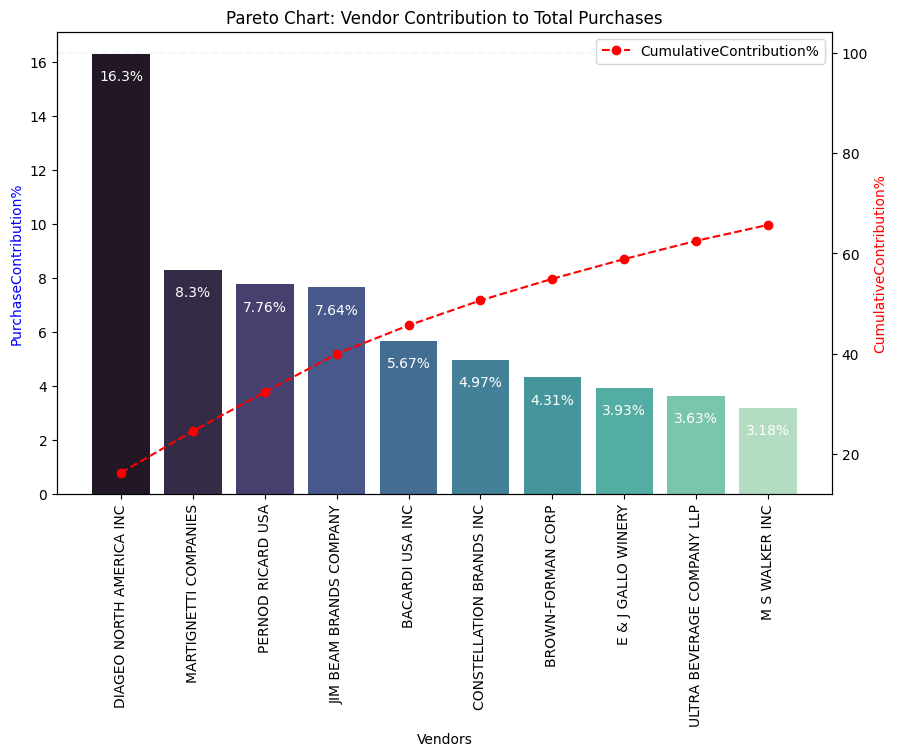

In [32]:
fig, ax1 = plt.subplots(figsize = (10, 6))

# Bar Plot for Purchase Contribution
sns.barplot(x = top_vendors['VendorName'], y = top_vendors['PurchaseContribution%'], palette = "mako", ax = ax1)

for i, value in enumerate(top_vendors['PurchaseContribution%']):
  ax1.text(i, value - 1, str(value)+'%', ha = 'center', fontsize = 10, color = 'white')

# Line Plot for Cumulative Contribution
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'], top_vendors['CumulativeContribution%'], color = 'red', marker = 'o', linestyle = 'dashed', label = 'CumulativeContribution%')

ax1.set_xticklabels(top_vendors['VendorName'], rotation = 90)
ax1.set_ylabel('PurchaseContribution%', color = 'blue')
ax2.set_ylabel('CumulativeContribution%', color = 'red')
ax1.set_xlabel('Vendors')
ax1.set_title('Pareto Chart: Vendor Contribution to Total Purchases')

ax2.axhline(y = 100, color = 'gray', linestyle = 'dashed', alpha = 0.07)
ax2.legend(loc = 'upper right')

plt.show()

> How much of the total procurement is dependent on the top vendors?



In [33]:
print(f"Total Purchase Contribution of Top 10 vendors is {round(top_vendors['PurchaseContribution%'].sum(),2)} %")

Total Purchase Contribution of Top 10 vendors is 65.69 %


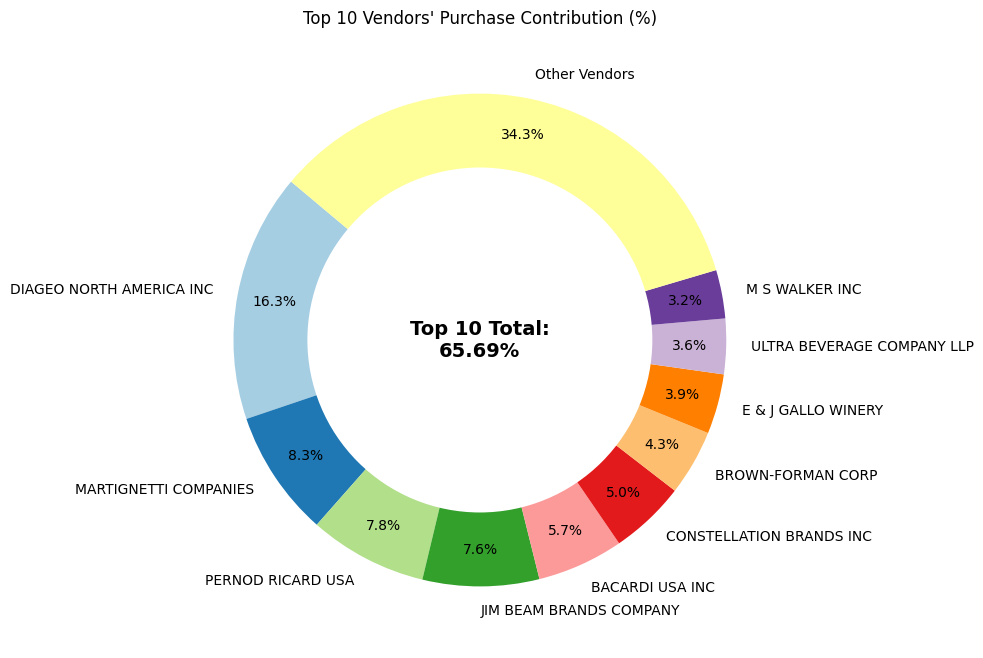

In [34]:
vendors = list(top_vendors['VendorName'].values)
purchase_contributions = list(top_vendors['PurchaseContribution%'].values)
total_contribution = sum(purchase_contributions)
remaining_contribution = 100 - total_contribution

# Append "Other Vendors" Category
vendors.append("Other Vendors")
purchase_contributions.append(remaining_contribution)

# Donut Chart
fig, ax = plt.subplots(figsize = (8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions, labels = vendors, autopct = '%1.1f%%',
                                   startangle = 140, pctdistance = 0.85, colors = plt.cm.Paired.colors)

centre_circle = plt.Circle((0,0), 0.70, fc = 'white')
fig.gca().add_artist(centre_circle)

# Add Total Contributions annotation in the center
plt.text(0, 0, f"Top 10 Total:\n{total_contribution:.2f}%", fontsize = 14, fontweight = 'bold', ha = 'center', va = 'center')

plt.title("Top 10 Vendors' Purchase Contribution (%)")
plt.show()

> Does purchasing in bulk reduce the unit price, and what is the optimal purchase volume for cost savings?



In [35]:
df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']
df

/tmp/ipython-input-3969775664.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['UnitPurchasePrice'] = df['TotalPurchaseDollars'] / df['TotalPurchaseQuantity']


,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,TotalSalesPrice,TotalExciseTax,FreightCost,GrossProfit,ProfitMargin,StockTurnover,SalesToPurchaseRatio,UnitPurchasePrice
1951,9819,TREASURY WINE ESTATES,20413,Pepperjack Barossa Red,15.99,23.99,750.0,12,191.88,8,191.92,119.95,0.88,14836.57,0.04,0.020842,0.666667,1.000208,15.99
1952,3252,E & J GALLO WINERY,19374,The Naked Grape Cab Svgn,11.99,17.99,3000.0,48,575.52,36,575.64,143.91,16.20,61966.91,0.12,0.020846,0.750000,1.000209,11.99
1953,9552,M S WALKER INC,24206,Flint & Steel Svgn Bl Napa V,9.99,14.99,750.0,12,119.88,8,119.92,119.92,0.88,55551.82,0.04,0.033356,0.666667,1.000334,9.99
1954,4692,KOBRAND CORPORATION,16196,Croft Tawny Porto,7.99,11.99,750.0,24,191.76,16,191.84,119.90,1.78,9139.38,0.08,0.041701,0.666667,1.000417,7.99
1955,4425,MARTIGNETTI COMPANIES,14099,Douglass Hill Merlot,3.99,5.99,750.0,36,143.64,24,143.76,29.95,2.71,144929.24,0.12,0.083472,0.666667,1.000835,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10511,12546,JIM BEAM BRANDS COMPANY,3406,Skinnygirl Tangerine Vodka,10.78,14.99,750.0,1,10.78,158,2368.42,1034.31,124.50,123880.97,2357.64,99.544844,158.000000,219.705009,10.78
10512,2555,DISARONNO INTERNATIONAL LLC,5831,DiSaronno Amaretto,5.34,6.99,200.0,4,21.36,684,4781.16,2320.68,143.64,5861.03,4759.80,99.553246,171.000000,223.837079,5.34
10513,9165,ULTRA BEVERAGE COMPANY LLP,11209,Pezzi King Svgn Bl Dry Creek,8.78,12.99,750.0,1,8.78,171,2221.29,1571.79,18.92,68054.70,2212.51,99.604734,171.000000,252.994305,8.78
10514,6213,MHW LTD,4703,Blue Chair Bay Coconut Rum,0.77,0.99,50.0,10,7.70,2745,2717.55,1270.17,141.27,9621.58,2709.85,99.716657,274.500000,352.928571,0.77


In [36]:
df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q = 3, labels = ["Small", "Medium", "Large"])

/tmp/ipython-input-3830537835.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["OrderSize"] = pd.qcut(df["TotalPurchaseQuantity"], q = 3, labels = ["Small", "Medium", "Large"])


In [37]:
df.groupby('OrderSize')[['UnitPurchasePrice']].mean()

/tmp/ipython-input-1505448859.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('OrderSize')[['UnitPurchasePrice']].mean()


,UnitPurchasePrice
OrderSize,
Small,39.068186
Medium,15.482067
Large,10.774898


/tmp/ipython-input-1288259854.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = df, x = "OrderSize", y = "UnitPurchasePrice", palette = "Set2")


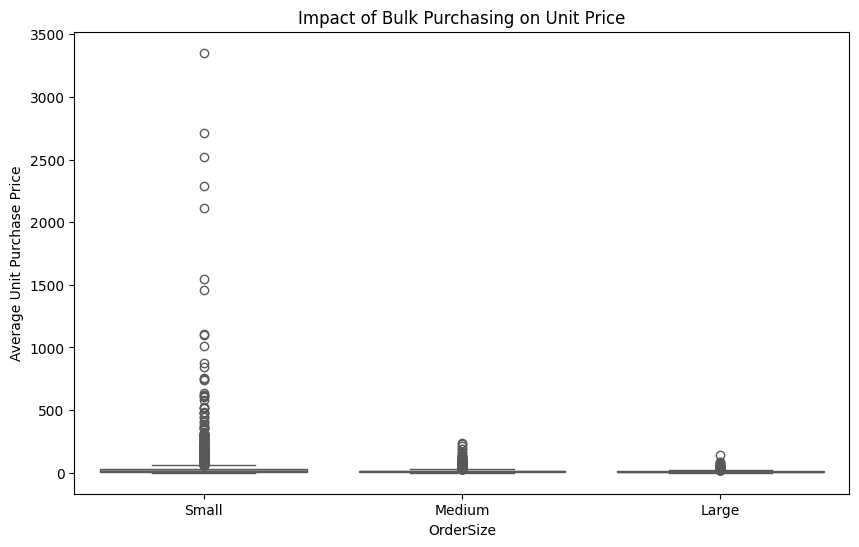

In [38]:
plt.figure(figsize = (10, 6))
sns.boxplot(data = df, x = "OrderSize", y = "UnitPurchasePrice", palette = "Set2")
plt.title("Impact of Bulk Purchasing on Unit Price")
plt.xlabel("OrderSize")
plt.ylabel("Average Unit Purchase Price")
plt.show()

*   Vendors buying in bulk (Large Order Size) get the lowest unit price i.e, $10.78 per unit, meaning higher profit margins, goven the inventory is managed efficiently.
*   The Price difference between Small and Large orders is substantial (~72% reduction in unit costs)
*   This suggests that bulk buying stategies encourages vendors to purchase in large volumnes, leading to higher overall sales despite lower per-unit revenue.








> Which vendors have low inventory turnover - an indicator of excess stock and slow-moving products?





In [39]:
df[df['StockTurnover'] < 1].groupby('VendorName')[['StockTurnover']].mean().sort_values('StockTurnover', ascending = True).head(10)

,StockTurnover
VendorName,
ALISA CARR BEVERAGES,0.615385
HIGHLAND WINE MERCHANTS LLC,0.708333
PARK STREET IMPORTS LLC,0.751306
Circa Wines,0.755676
Dunn Wine Brokers,0.766022
CENTEUR IMPORTS LLC,0.773953
SMOKY QUARTZ DISTILLERY LLC,0.783835
TAMWORTH DISTILLING,0.797078
THE IMPORTED GRAPE LLC,0.807569




> How much capital is locked in unsold inventory per vendor, and which vendors contribute the most to it?



In [40]:
df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]
print('Total Unsold Capital:', format_dollars(df["UnsoldInventoryValue"].sum()))

Total Unsold Capital: 2.71M


/tmp/ipython-input-3402833449.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["UnsoldInventoryValue"] = (df["TotalPurchaseQuantity"] - df["TotalSalesQuantity"]) * df["PurchasePrice"]


In [41]:
# Aggregate Capital Locked per Vendor
inventory_value_per_vendor = df.groupby("VendorName")["UnsoldInventoryValue"].sum().reset_index()

# Sort Vendors with Highest Locked Capital
inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by = "UnsoldInventoryValue", ascending = False)
inventory_value_per_vendor['UnsoldInventoryValue'] = inventory_value_per_vendor['UnsoldInventoryValue'].apply(format_dollars)
inventory_value_per_vendor.head(10)

,VendorName,UnsoldInventoryValue
25,DIAGEO NORTH AMERICA INC,722.21K
46,JIM BEAM BRANDS COMPANY,554.67K
68,PERNOD RICARD USA,470.63K
116,WILLIAM GRANT & SONS INC,401.96K
30,E & J GALLO WINERY,228.28K
79,SAZERAC CO INC,198.44K
11,BROWN-FORMAN CORP,177.73K
20,CONSTELLATION BRANDS INC,133.62K
61,MOET HENNESSY USA INC,126.48K
77,REMY COINTREAU USA INC,118.60K




> What is the 95% confidence intervals for profit margins of top-performing and low-performing vendors?



In [42]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

In [43]:
top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

In [44]:
top_vendors

,ProfitMargin
1959,0.351704
1961,0.473334
1978,0.914068
1984,1.135783
1991,1.298720
...,...
10040,85.782102
10307,93.085860
10348,94.271857
10370,95.012530


In [45]:
low_vendors

,ProfitMargin
1951,0.020842
1952,0.020846
1953,0.033356
1954,0.041701
1955,0.083472
...,...
10489,98.617500
10491,98.683656
10495,98.974037
10504,99.166079


In [46]:
def confidence_interval(data, confidence = 0.95):
    mean_val = np.mean(data)
    std_err = np.std(data, ddof = 1) / np.sqrt(len(data))
    t_critical = stats.t.ppf((1 + confidence) / 2, df = len(data) - 1)
    margin_of_error = t_critical * std_err
    return mean_val, mean_val - margin_of_error, mean_val + margin_of_error

Top Vendors 95% CI: (30.77, 31.65), Mean: 31.21
Low Vendors 95% CI: (40.49, 42.63), Mean: 41.56


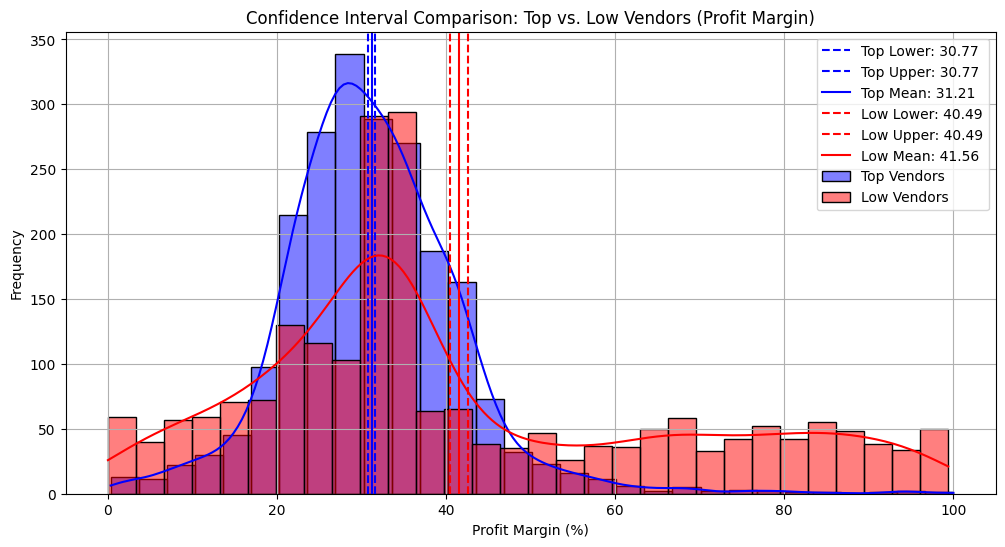

In [47]:
top_mean, top_lower, top_upper = confidence_interval(top_vendors)
low_mean, low_lower, low_upper = confidence_interval(low_vendors)

print(f"Top Vendors 95% CI: ({top_lower:.2f}, {top_upper:.2f}), Mean: {top_mean:.2f}")
print(f"Low Vendors 95% CI: ({low_lower:.2f}, {low_upper:.2f}), Mean: {low_mean:.2f}")

plt.figure(figsize = (12, 6))

# Top Vendors Plot
sns.histplot(top_vendors, kde = True, color = "blue", bins = 30, alpha = 0.5, label = "Top Vendors")
plt.axvline(top_lower, color = "blue", linestyle = "--", label = f"Top Lower: {top_lower:.2f}")
plt.axvline(top_upper, color = "blue", linestyle = "--", label = f"Top Upper: {top_lower:.2f}")
plt.axvline(top_mean, color = "blue", linestyle = "-", label = f"Top Mean: {top_mean:.2f}")

# Low Vendors Plot
sns.histplot(low_vendors, kde = True, color = "red", bins = 30, alpha = 0.5, label = "Low Vendors")
plt.axvline(low_lower, color = "red", linestyle = "--", label = f"Low Lower: {low_lower:.2f}")
plt.axvline(low_upper, color = "red", linestyle = "--", label = f"Low Upper: {low_lower:.2f}")
plt.axvline(low_mean, color = "red", linestyle = "-", label = f"Low Mean: {low_mean:.2f}")

# Final Chart
plt.title("Confidence Interval Comparison: Top vs. Low Vendors (Profit Margin)")
plt.xlabel("Profit Margin (%)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()

*   The confidence interval for low-performing vendors (40.48% to 42.62%) is significantly higher than that of top-performing vendors (30.74% to 31.61%).
*   This suggests that vendors with lower sales tend to maintain higher profit margins, potentially due to premium pricing or lower operational costs.
*   For High-Performing Vendor: If they aim to improve profitability, they could explore selective price adjustments, cost optimization, or bundling startegies.
*   For Low-Performing Vendors: Despite higher margins, their low sales volume might indicate a need for better marketing, competitive pricing, or improved distribution strategies.



>Is there a significant difference in profit margins between top-performing and low-performing vendors?

Hypothesis:

H₀ (Null Hypothesis): There is no signigficant difference in the mean profit margins of top-performing and low-performing vendors.

H₁ (Alternative Hypothesis): The mean profit margins of top-performing and low-performing vendors are significantly different.

In [48]:
top_threshold = df["TotalSalesDollars"].quantile(0.75)
low_threshold = df["TotalSalesDollars"].quantile(0.25)

top_vendors = df[df["TotalSalesDollars"] >= top_threshold]["ProfitMargin"].dropna()
low_vendors = df[df["TotalSalesDollars"] <= low_threshold]["ProfitMargin"].dropna()

# Two-Sample Test
t_stat, p_value = ttest_ind(top_vendors, low_vendors, equal_var = False)

print(f"T-Statistic: {t_stat:.4f}, P-Value: {p_value:.4f}")
if p_value < 0.05:
  print("Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.")
else:
  print("Accept H₀: No significant difference in profit margins.")

T-Statistic: -17.5815, P-Value: 0.0000
Reject H₀: There is a significant difference in profit margins between top and low-performing vendors.
